In [449]:
import numpy as np 
import pandas as pd

In [450]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [451]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [452]:
df.shape

(5572, 5)

In [453]:
# 1.data cleaning
# 2.EDA
# 3.Text preprocessing
# 4.model building 
# 5.Evaluation
# 6.Improvements based on evaluation
# 7.Creating website
# 8.Deploy

## Data Cleaning


In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [455]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'] ,inplace=True)

In [456]:
df.sample(5)

,v1,v2
953,ham,Also remember to get dobby's bowl from your car
1436,ham,I jus hope its true that missin me cos i'm re...
2385,spam,Someone has contacted our dating service and e...
3355,ham,Ok not a problem will get them a taxi. C ing ...
1538,ham,Midnight at the earliest


In [457]:
df.rename(columns={'v1':'Target', 'v2' : 'Text'} , inplace=True)

In [458]:
df.sample(5)

,Target,Text
397,ham,You are always putting your business out there...
245,ham,Too late. I said i have the website. I didn't ...
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...
4739,ham,"I keep seeing weird shit and bein all \woah\"" ..."
5014,ham,I think the other two still need to get cash b...


In [459]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [460]:
df['Target'] = encoder.fit_transform(df['Target'])

In [461]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [462]:
#missing values 
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [463]:
#check for duplicate values 
int(df.duplicated().sum())


403

In [464]:
#remove duplicates
df= df.drop_duplicates(keep='first')

In [465]:
#check : the duplicated values should be 0 now
int(df.duplicated().sum())

0

In [466]:
df.shape

(5169, 2)

## EDA


In [467]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [468]:
import matplotlib.pyplot as plt

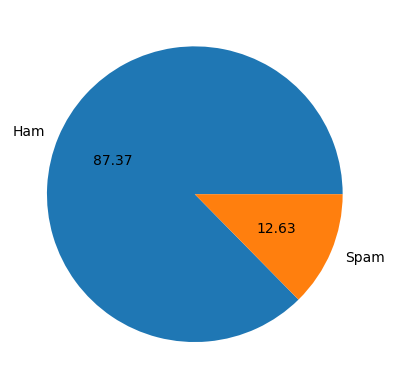

In [469]:
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [470]:
# Data Is imbalanced

In [471]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vishwajeetsuwrudheshpadole/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vishwajeetsuwrudheshpadole/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [472]:
df['num_characters']=df['Text'].apply(len)

In [473]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [474]:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [475]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [476]:
df['num_sentences']=df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [477]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [478]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [479]:
df [df['Target'] == 0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [480]:
df [df['Target'] == 1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [481]:
import seaborn as sns

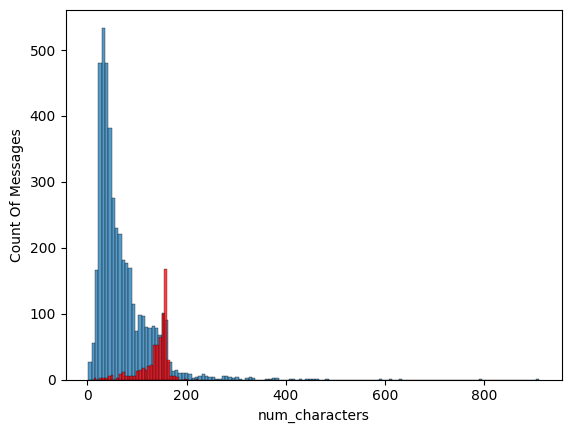

In [482]:
# plt.figure(figsize=(5,5))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='Red')
plt.ylabel('Count Of Messages')
plt.show()

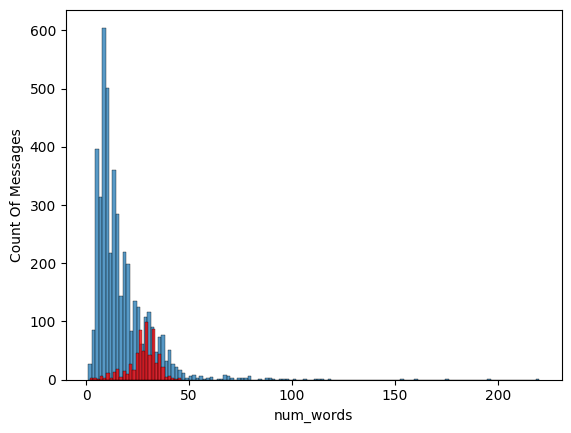

In [483]:
# plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='Red')

plt.ylabel('Count Of Messages')
plt.show()

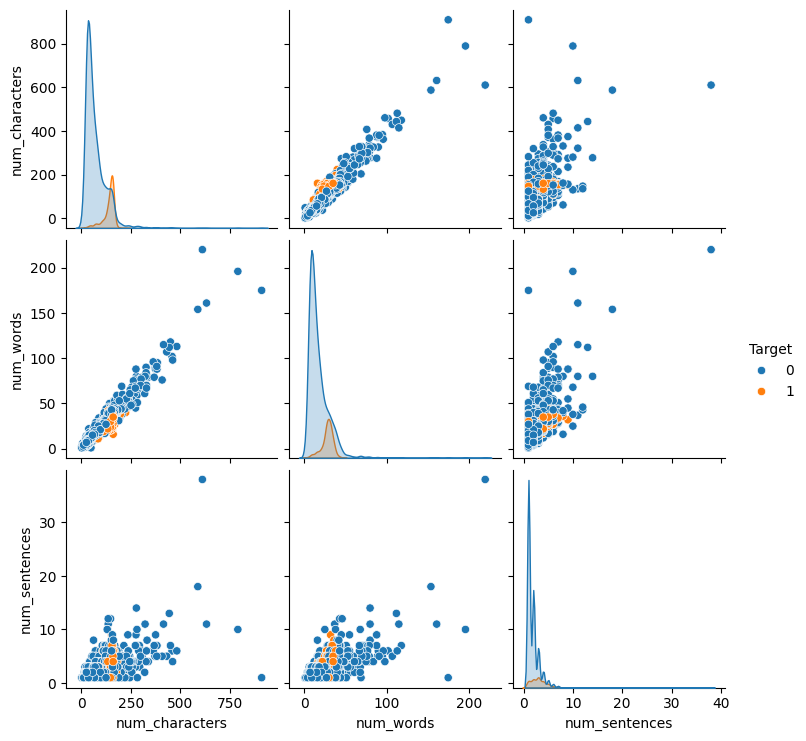

In [484]:
sns.pairplot(df,hue='Target')

<Axes: >

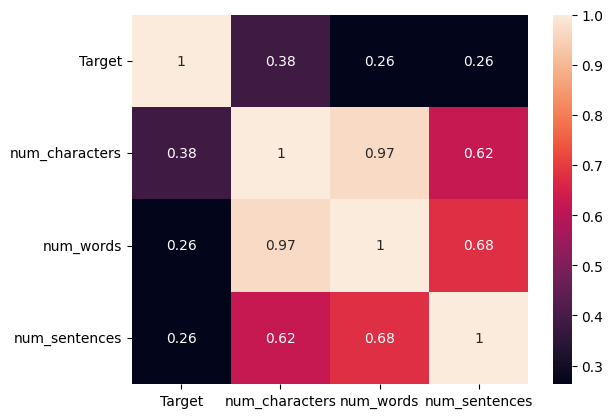

In [485]:
# sns.heatmap(df.corr(),annot=True)
sns.heatmap(df.corr(numeric_only=True), annot=True)

## 3. Data Preprocessing
* Lower Case 
* Tokenization
* Removing special characters 
* Removing stop words and punctuation
* Stemming

In [486]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [487]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text : 
        y.append(ps.stem(i))


    return " ".join(y)

In [488]:
transform_text('Hi How Are You Vishwajeet and why are you dancing ! ')

'hi vishwajeet danc'

In [489]:

# ps.stem('dancing','loving')  --- this is wrong way 

# 1. Put your words in a list
words = ['dancing' , 'loving'] 

# 2. Use a concise loop (List Comprehension)
stemmed_words = [ps.stem(word) for word in words]

print(stemmed_words)

['danc', 'love']


In [490]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [491]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [492]:
from wordcloud import WordCloud
wc = WordCloud(width=550 , height=550,min_font_size=10,background_color='white')

In [493]:
spam_wc = wc.generate(df[df['Target']== 1] ['Transformed_Text'].str.cat(sep = " "))

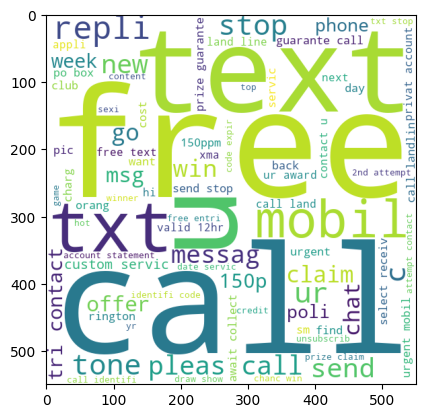

In [494]:
plt.imshow(spam_wc)

In [495]:
ham_wc = wc.generate(df[df['Target']== 0] ['Transformed_Text'].str.cat(sep = " "))

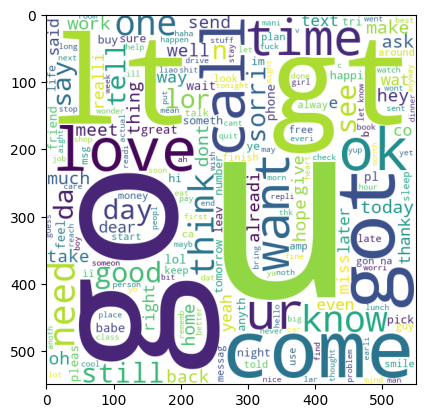

In [496]:
plt.imshow(ham_wc)

In [497]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [498]:
# for msg in df[df['Target']== 1]['Transformed_Text'].tolist():
#     print(msg)

In [499]:
spam_corpus = []
for msg in df[df['Target']== 1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [500]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [501]:
len(spam_corpus)

9939

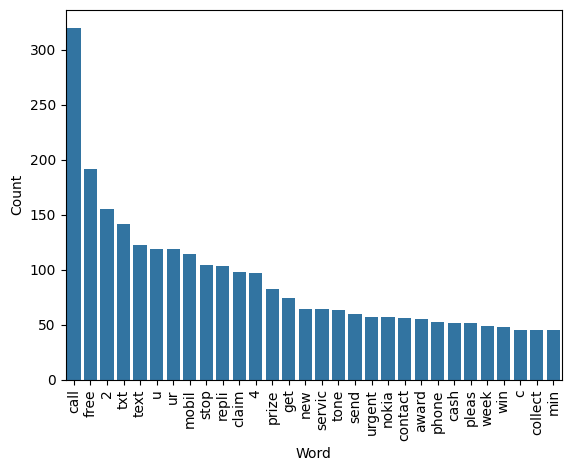

In [502]:


from collections import Counter
# Create a single DataFrame for the most common words and their counts
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the plot by specifying the x and y columns
sns.barplot(data=spam_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()


In [503]:
ham_corpus = []
for msg in df[df['Target']== 0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [504]:
len(ham_corpus)

35404

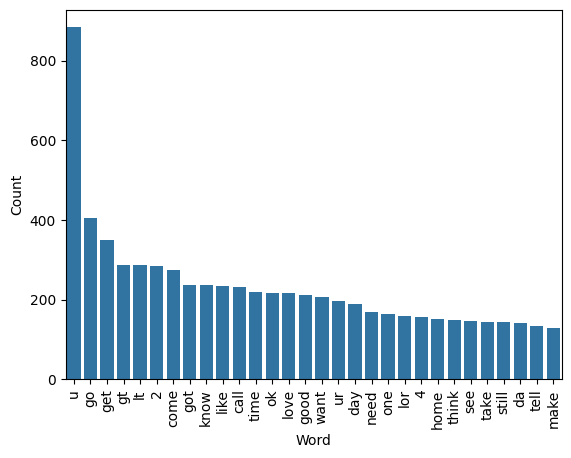

In [505]:


from collections import Counter

# Create a single DataFrame for the most common ham words
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create the plot by specifying the data, x, and y columns
sns.barplot(data=ham_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [506]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [507]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [508]:
#Scaling X 

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

appending the num_character col to x

In [509]:

# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
''' adding this extra column is improving the accuracy and precision of bnb to 99 each 
but it is reducing the accuracy and precision of mnb which was 97 and 1 before this '''

' adding this extra column is improving the accuracy and precision of bnb to 99 each \nbut it is reducing the accuracy and precision of mnb which was 97 and 1 before this '

In [510]:
y = df['Target'].values

In [511]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [512]:
from sklearn.model_selection import train_test_split

In [513]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [514]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [515]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [516]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test) 
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [517]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test) 
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [518]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test) 
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [519]:
# voting classifier 
from sklearn.ensemble import VotingClassifier

In [520]:
voting = VotingClassifier(estimators=[('mnb',mnb),('bnb',bnb)],voting='soft')

In [521]:
voting.fit(X_train,y_train)

,estimators,"[('mnb', ...), ('bnb', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,alpha,1.0


In [522]:
y_pred = voting.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))


accuracy 0.9816247582205029
precision 0.9917355371900827


In [523]:
from sklearn.ensemble import RandomForestClassifier

In [524]:
# Applying Stacking
estimators=[('mnb',mnb),('bnb',bnb)]
final_estimator = RandomForestClassifier()

In [525]:
from sklearn.ensemble import StackingClassifier

In [526]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [527]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9338235294117647


In [528]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


# 5.Model Improving